In [1130]:
#import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [1131]:
#importing data from csv file
calls=pd.read_csv("GIVE THE PATH NAME WHERE YOU HAVE SAVED YOUR FILE")
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 17:40,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,NaN,EMS: DIZZINESS,10-12-2015 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [1132]:
#checking data types
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [1133]:
#checking for null values
calls.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [1134]:
#filling up the null values
columns=["zip","twp","addr"]
calls.loc[:, columns]=calls.loc[:, columns].ffill()

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        99492 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99492 non-null  object 
 7   addr       99492 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [1135]:
#grouping all tiltles under 3 main reasons EMS, Fire, Traffic
calls['Reason'] = calls['title'].apply(lambda title: title.split(':')[0])
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,10-12-2015 17:40,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,10-12-2015 17:40,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,10-12-2015 17:40,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,10-12-2015 17:40,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,19401.0,EMS: DIZZINESS,10-12-2015 17:40,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [1136]:
#checking type of timeStamp column
type(calls['timeStamp'])

pandas.core.series.Series

In [1137]:
#converting series to datetiem format
calls["timeStamp"]=pd.to_datetime(calls["timeStamp"])
time=calls["timeStamp"].iloc[0]

In [1138]:
#Dividing timeStamp column into hours, month, week, year and date
calls["Hours"]=calls["timeStamp"].apply(lambda time : time.hour)
calls["Month"]=calls["timeStamp"].apply(lambda time : time.month)
calls["Day of Week"]=calls["timeStamp"].apply(lambda time : time.dayofweek)
calls['Date']=calls['timeStamp'].apply(lambda time: time.date())
calls["Year"]=calls['timeStamp'].apply(lambda time: time.year)
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hours,Month,Day of Week,Date,Year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station 332; 2015-12-10 @ 17:10:52;,19525.0,EMS: BACK PAINS/INJURY,2015-10-12 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,10,0,2015-10-12,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP; Station 345; 2015-12-10 @ 17:29:21;,19446.0,EMS: DIABETIC EMERGENCY,2015-10-12 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,10,0,2015-10-12,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-Station:STA27;,19401.0,Fire: GAS-ODOR/LEAK,2015-10-12 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,10,0,2015-10-12,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A; 2015-12-10 @ 16:47:36;,19401.0,EMS: CARDIAC EMERGENCY,2015-10-12 17:40:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,10,0,2015-10-12,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; Station 329; 2015-12-10 @ 16:56:52;,19401.0,EMS: DIZZINESS,2015-10-12 17:40:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,10,0,2015-10-12,2015


In [1139]:
#droping columns that are not requred
calls.drop(["lat","lng","e","desc","timeStamp"],axis=1,inplace=True)
calls.head()

,zip,title,twp,addr,Reason,Hours,Month,Day of Week,Date,Year
0,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,10,0,2015-10-12,2015
1,19446.0,EMS: DIABETIC EMERGENCY,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,10,0,2015-10-12,2015
2,19401.0,Fire: GAS-ODOR/LEAK,NORRISTOWN,HAWS AVE,Fire,17,10,0,2015-10-12,2015
3,19401.0,EMS: CARDIAC EMERGENCY,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,10,0,2015-10-12,2015
4,19401.0,EMS: DIZZINESS,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,10,0,2015-10-12,2015


In [1140]:
#droping all the date from year 2015
calls.drop(calls.loc[calls['Year']==2015].index, inplace=True)
calls.head()

,zip,title,twp,addr,Reason,Hours,Month,Day of Week,Date,Year
7969,19401.0,EMS: ASSAULT VICTIM,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,EMS,0,1,4,2016-01-01,2016
7970,19401.0,EMS: FALL VICTIM,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,EMS,0,1,4,2016-01-01,2016
7971,19464.0,EMS: ABDOMINAL PAINS,WEST POTTSGROVE,VINE ST & CENTER ST,EMS,0,1,4,2016-01-01,2016
7972,19464.0,EMS: ALTERED MENTAL STATUS,UPPER MERION,MARK LN & DEAD END,EMS,0,1,4,2016-01-01,2016
7973,19002.0,EMS: DIABETIC EMERGENCY,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,EMS,0,1,4,2016-01-01,2016


In [1141]:
#Top 10 townships
calls["twp"].value_counts()[:10]

LOWER MERION        7852
ABINGTON            5464
NORRISTOWN          5440
UPPER MERION        4785
CHELTENHAM          4232
POTTSTOWN           3832
UPPER MORELAND      3160
LOWER PROVIDENCE    2966
PLYMOUTH            2917
HORSHAM             2768
Name: twp, dtype: int64

In [1142]:
town1=calls[calls["twp"]=="LOWER MERION"]["title"].value_counts().head()
town1

Traffic: VEHICLE ACCIDENT -    2159
Traffic: DISABLED VEHICLE -     733
Fire: FIRE ALARM                715
Traffic: ROAD OBSTRUCTION -     387
EMS: VEHICLE ACCIDENT           321
Name: title, dtype: int64

In [1143]:
town2=calls[calls["twp"]=="ABINGTON"]["title"].value_counts().head()
town2

Traffic: VEHICLE ACCIDENT -    1199
Fire: FIRE ALARM                439
Traffic: DISABLED VEHICLE -     376
EMS: RESPIRATORY EMERGENCY      312
EMS: FALL VICTIM                287
Name: title, dtype: int64

In [1144]:
town3=calls[calls["twp"]=="NORRISTOWN"]["title"].value_counts().head()
town3

Traffic: VEHICLE ACCIDENT -    862
EMS: RESPIRATORY EMERGENCY     424
EMS: CARDIAC EMERGENCY         317
EMS: SUBJECT IN PAIN           316
EMS: FALL VICTIM               276
Name: title, dtype: int64

In [1145]:
#top 10 titles
calls["title"].value_counts()[:10]

Traffic: VEHICLE ACCIDENT -    20889
Traffic: DISABLED VEHICLE -     7187
Fire: FIRE ALARM                5061
EMS: RESPIRATORY EMERGENCY      4683
EMS: CARDIAC EMERGENCY          4589
EMS: FALL VICTIM                4473
EMS: VEHICLE ACCIDENT           3574
Traffic: ROAD OBSTRUCTION -     2949
EMS: SUBJECT IN PAIN            2504
EMS: HEAD INJURY                2440
Name: title, dtype: int64

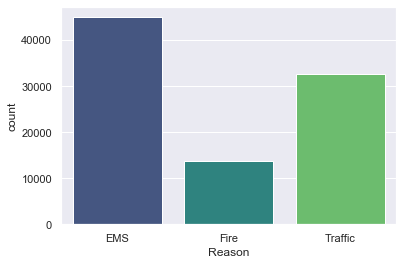

In [1146]:
#top most reason to call 911
sns.countplot(x='Reason',data=calls,palette='viridis')
plt.style.use('dark_background')

In [1147]:
#converting integer value into its actual string names 
#to the day of the week and month using .map() function
weekmap={0:"Mon", 1:"Tue", 2:"Wed", 3:"Thur", 4:"Fri", 5:"Sat", 6:"Sun"}
calls["Day of Week"]=calls["Day of Week"].map(weekmap)
monthmap={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep",10:"Oct", 11:"Nov", 12:"Dec"}
calls["Month"]=calls["Month"].map(monthmap)
calls.head()

,zip,title,twp,addr,Reason,Hours,Month,Day of Week,Date,Year
7969,19401.0,EMS: ASSAULT VICTIM,NORRISTOWN,ROSEMONT AVE & W WASHINGTON ST,EMS,0,Jan,Fri,2016-01-01,2016
7970,19401.0,EMS: FALL VICTIM,EAST NORRITON,GERMANTOWN PIKE & HANNAH AVE,EMS,0,Jan,Fri,2016-01-01,2016
7971,19464.0,EMS: ABDOMINAL PAINS,WEST POTTSGROVE,VINE ST & CENTER ST,EMS,0,Jan,Fri,2016-01-01,2016
7972,19464.0,EMS: ALTERED MENTAL STATUS,UPPER MERION,MARK LN & DEAD END,EMS,0,Jan,Fri,2016-01-01,2016
7973,19002.0,EMS: DIABETIC EMERGENCY,AMBLER,BANNOCKBURN AVE & S SPRING GARDEN ST,EMS,0,Jan,Fri,2016-01-01,2016


Text(0.5, 1.0, 'Frequency of calls per month')

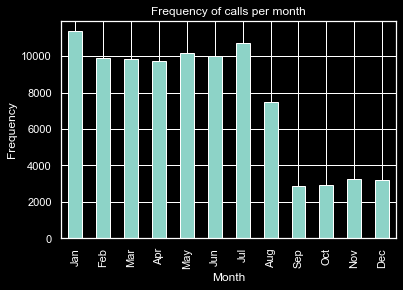

In [1148]:
#Frequency of calls per month
months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
calls["Month"].value_counts().reindex(months).plot(kind="bar")
plt.style.use('dark_background')
plt.xlabel('Month') 
plt.ylabel('Frequency') 
plt.title('Frequency of calls per month')

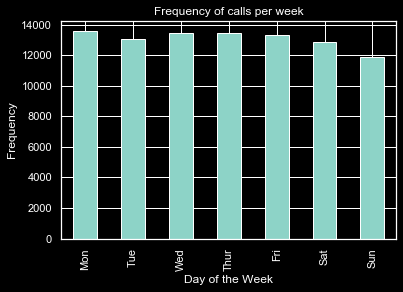

In [1149]:
weeks = ["Mon","Tue","Wed","Thur","Fri","Sat","Sun"]
calls["Day of Week"].value_counts().reindex(weeks).plot(kind="bar")
plt.xlabel('Day of the Week') 
plt.ylabel('Frequency') 
plt.title('Frequency of calls per week') 
plt.style.use('dark_background')

Text(0.5, 1.0, 'Frequency of calls per hour')

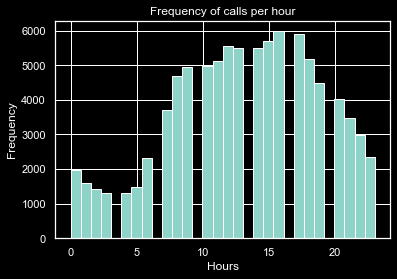

In [1150]:
#hourly distribution of calls
plt.style.use('dark_background')
calls['Hours'].hist(bins=30)
plt.xlabel('Hours') 
plt.ylabel('Frequency') 
plt.title('Frequency of calls per hour') 

Text(0.5, 1.0, 'Count of each reason per week')

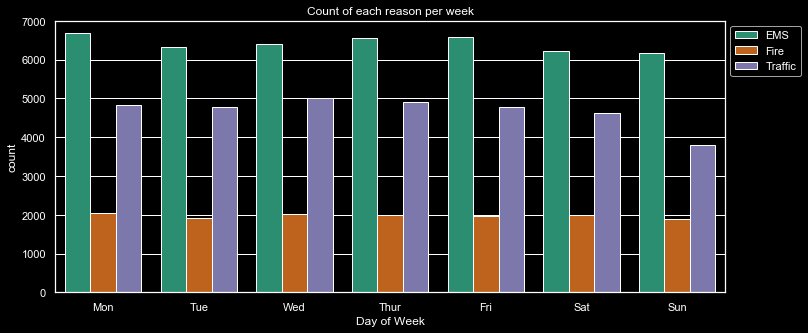

In [1151]:
#Count of EMS, Fire and Traffic week wise
fig_dims = (12, 5)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(x='Day of Week',data=calls,hue='Reason',palette='Dark2',order=weeks)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.style.use('dark_background')
plt.title('Count of each reason per week') 

Text(0.5, 1.0, 'Count of each reason per month')

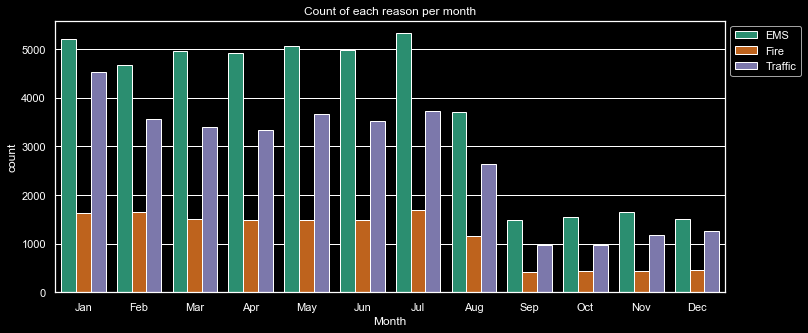

In [1152]:
#count of EMS, Fire and Traffic month wise
fig_dims = (12, 5)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(x='Month',data=calls,hue='Reason',palette='Dark2')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.style.use('dark_background')
plt.title('Count of each reason per month') 

Text(0.5, 1.0, 'Count of each reason per hour')

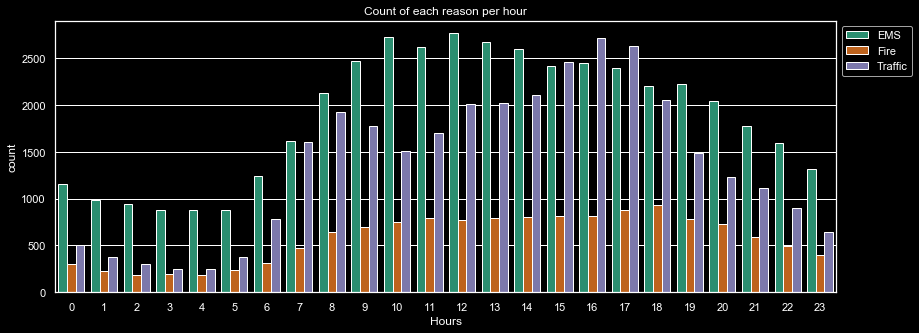

In [1153]:
#count of EMS, Fire and Traffic hour wise
fig_dims = (14, 5)
fig = plt.subplots(figsize=fig_dims)
sns.countplot(x='Hours',data=calls,hue='Reason',palette='Dark2')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.5)
plt.style.use('dark_background')
plt.title('Count of each reason per hour') 

In [1154]:
#grouping number of calls month/hour
monthhour=calls.groupby(["Month","Hours"]).count()["Reason"].unstack().reindex(months)
monthhour

Hours,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Month,,,,,,,,,,,,,,,,,,,,,,,,
Jan,274,189,189,176,184,200,331,485,687,634,621,692,704,637,678,626,663,731,653,527,470,379,329,296
Feb,231,184,156,148,137,176,244,445,479,459,518,497,555,641,546,592,591,594,577,524,467,426,390,304
Mar,196,157,153,144,154,175,289,457,533,588,551,552,588,572,607,616,676,601,502,454,423,358,289,230
Apr,203,176,137,129,141,139,254,401,497,489,540,538,622,541,597,621,657,630,579,484,434,365,298,253
May,222,175,165,141,150,159,238,374,512,525,503,592,623,578,602,687,691,713,588,458,428,436,369,262
Jun,197,165,140,141,127,161,269,373,473,555,569,519,619,582,619,651,674,657,542,503,434,370,364,281
Jul,224,199,183,168,147,188,243,366,512,591,598,564,647,637,682,635,744,722,630,594,474,395,330,256
Aug,177,144,125,111,107,120,162,261,391,434,435,430,491,481,443,467,500,484,416,310,317,281,217,186
Sep,48,55,42,49,35,51,69,118,122,155,142,170,182,197,176,170,205,193,180,138,117,112,78,66


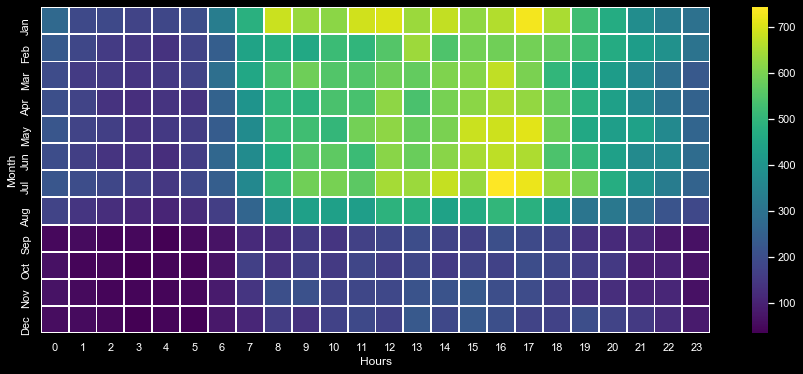

In [1155]:
plt.figure(figsize=(15,6))
sns.heatmap(monthhour,cmap='viridis',linewidths=1)
plt.style.use('dark_background')

In [1156]:
#grouping count of calls week/hour
weekhour=calls.groupby(["Day of Week","Hours"]).count()["Reason"].unstack().reindex(weeks)
weekhour

Hours,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Mon,255,207,194,173,194,235,337,583,709,729,714,760,797,804,803,882,927,917,778,739,609,482,435,285
Tue,271,222,176,174,192,219,333,557,711,728,743,756,828,821,821,813,904,832,748,622,490,424,373,272
Wed,245,211,185,194,156,219,352,567,830,802,729,711,763,778,794,855,869,863,783,613,624,532,438,329
Thur,265,205,212,161,162,183,324,523,679,738,774,734,811,850,786,876,856,875,739,663,643,589,426,374
Fri,271,213,201,182,205,201,375,528,724,667,734,760,768,810,832,817,898,879,744,632,547,472,460,404
Sat,342,256,208,228,218,235,297,453,563,648,666,743,827,748,754,754,815,819,748,637,583,494,453,357
Sun,313,276,247,205,186,202,311,491,486,629,620,645,759,683,719,702,713,710,649,583,520,490,412,334


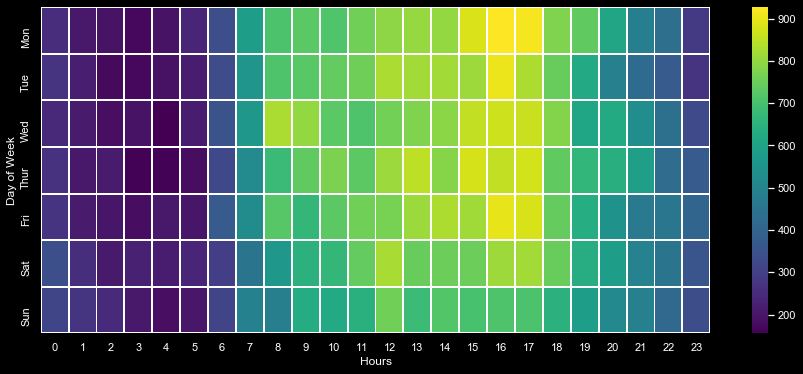

In [1157]:
plt.figure(figsize=(15,6))
sns.heatmap(weekhour,cmap='viridis',linewidths=1)
plt.style.use('dark_background')

In [1158]:
#grouping count of calls week/month
wm1=calls.groupby(["Day of Week","Month"]).count()["Reason"].unstack().reindex(weeks)
wm2=wm.transpose().reindex(months)
weekmonth=wm2.transpose()
weekmonth

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Day of Week,,,,,,,,,,,,
Mon,1364,1966,1463,1217,1481,1617,1381,1486,357,406,417,393
Tue,1077,1373,1797,1174,1476,1650,1258,1221,441,281,866,416
Wed,1707,1458,1525,1482,1126,1962,1743,954,279,378,439,389
Thur,1610,1177,1494,1495,1197,1568,1646,729,715,404,384,1029
Fri,1995,1138,1359,1956,1622,1100,1907,779,380,323,381,384
Sat,1965,1497,980,1412,1467,1063,1373,1188,396,751,404,350
Sun,1637,1272,1247,989,1822,1025,1421,1133,302,413,360,264


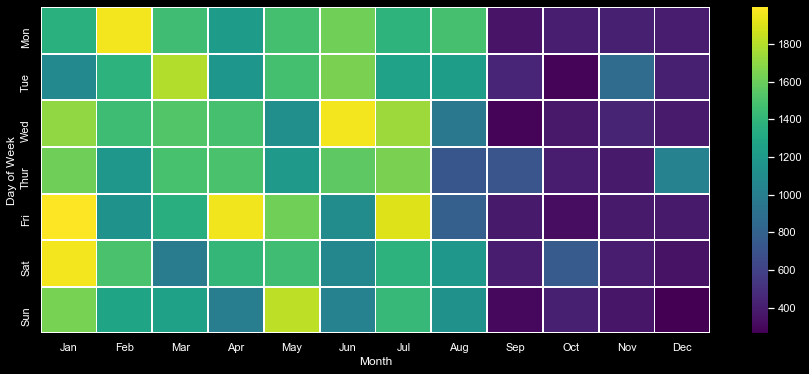

In [1159]:
plt.figure(figsize=(15,6))
sns.heatmap(weekmonth,cmap='viridis',linewidths=1)
plt.style.use('dark_background')

In [1160]:
#count of each reason month wise
pvt1=pd.pivot_table(calls,index="Reason",columns="Month",values="Date",aggfunc="count",fill_value=0)
pvt1["Avg"]=round(pvt1.mean(numeric_only=True, axis=1),2)
pvt1

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Avg
Reason,,,,,,,,,,,,,
EMS,4924,3695,1505,4669,5204,5316,4982,4958,5055,1643,1551,1477,3748.25
Fire,1476,1157,460,1649,1625,1681,1495,1515,1480,437,430,419,1152.00
Traffic,3325,2638,1260,3563,4526,3732,3508,3392,3656,1171,975,974,2726.67


In [1161]:
#number of cals from towns per month
pvt2=pd.pivot_table(calls,index="twp",columns="Month",values="Date",aggfunc=len,fill_value=0)
pvt2["Avg"]=round(pvt2.mean(numeric_only=True, axis=1),2)
pvt2.sort_values(by="Avg", ascending=False)

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Avg
twp,,,,,,,,,,,,,
LOWER MERION,812,741,278,858,883,942,816,843,901,287,223,268,654.33
ABINGTON,616,465,174,611,682,611,604,575,601,176,180,169,455.33
NORRISTOWN,628,391,175,557,735,636,559,620,579,223,177,160,453.33
UPPER MERION,505,407,172,508,587,625,484,497,483,188,177,152,398.75
CHELTENHAM,473,391,134,471,516,474,471,438,471,138,128,127,352.67
POTTSTOWN,375,292,123,418,487,459,435,410,443,134,117,139,319.33
UPPER MORELAND,315,252,116,336,398,365,367,313,382,109,124,83,263.33
LOWER PROVIDENCE,315,226,110,322,389,342,340,315,331,114,88,74,247.17
PLYMOUTH,323,266,120,288,314,330,337,310,345,109,99,76,243.08


Text(0.5, 1.0, 'Frequency of Top 5 EMS Situations Monthly')

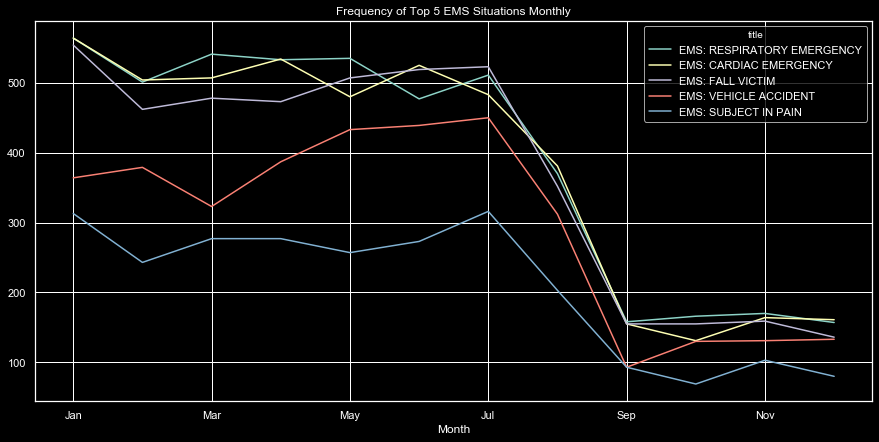

In [1344]:
#count of each EMS calls month wise
EMS=calls[calls.Reason.isin(["EMS"])]
pvt3=pd.pivot_table(EMS,index="title",columns="Month",values="Date",aggfunc=len,fill_value=0)
pvt3["Total"]=round(pvt3.sum(numeric_only=True, axis=1),2)
df3=pvt3.sort_values(by="Total", ascending=False).head(5)
eg=df3.drop("Total",axis=1).transpose().reindex(months)
eg.plot.line()
plt.gcf().set_size_inches(15,7)
plt.title('Frequency of Top 5 EMS Situations Monthly') 

Text(0.5, 1.0, 'Frequency of Top 5 Fire Situations Monthly')

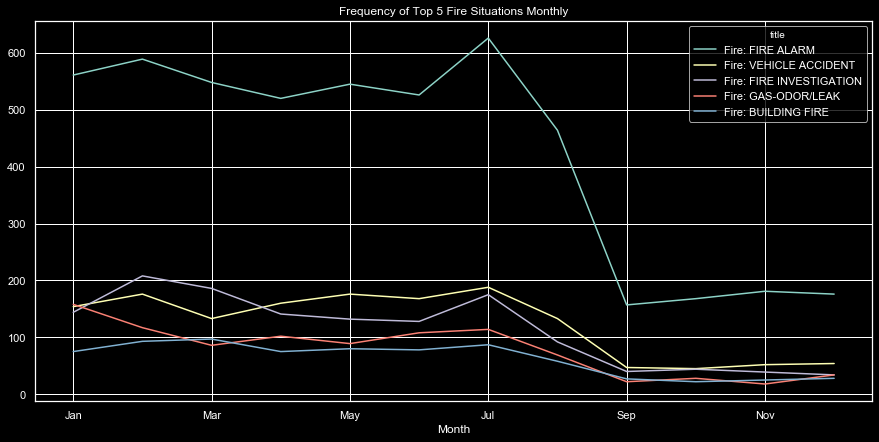

In [1342]:
#count of each Fire calls month wise
Fire=calls[calls.Reason.isin(["Fire"])]
pvt4=pd.pivot_table(Fire,index="title",columns="Month",values="Date",aggfunc=len,fill_value=0)
pvt4["Total"]=round(pvt4.sum(numeric_only=True, axis=1),2)
df4=pvt4.sort_values(by="Total", ascending=False).head(5)
fg=df4.drop("Total",axis=1).transpose().reindex(months)
fg.plot.line()
plt.gcf().set_size_inches(15,7)
plt.title('Frequency of Top 5 Fire Situations Monthly') 

Text(0.5, 1.0, 'Frequency of Top 5 Traffic Situations Monthly')

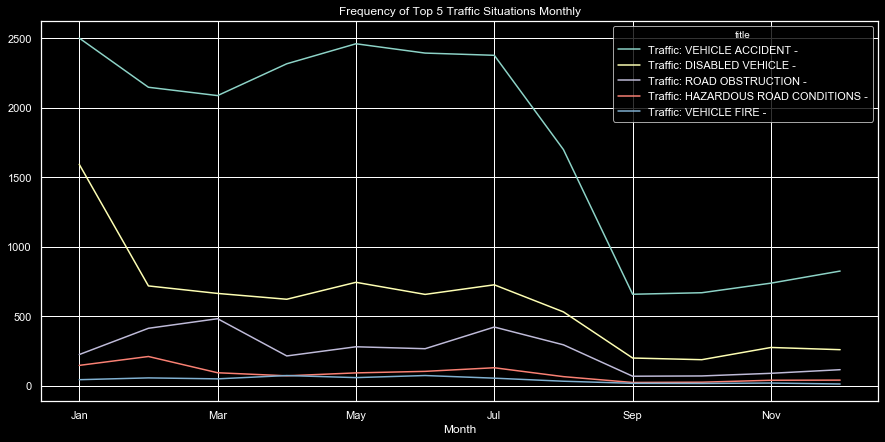

In [1338]:
#count of each Traffic calls month wise
Traffic=calls[calls.Reason.isin(["Traffic"])]
pvt5=pd.pivot_table(Traffic,index="title",columns="Month",values="Date",aggfunc=len,fill_value=0)
pvt5["Total"]=round(pvt5.sum(numeric_only=True, axis=1),2)
df5=pvt5.sort_values(by="Total", ascending=False).head(5)
tg=df5.drop("Total",axis=1).transpose().reindex(months)
tg.plot.line()
plt.gcf().set_size_inches(15,7)
plt.title('Frequency of Top 5 Traffic Situations Monthly') 

***Findings***
* Most of the calls were made for emergency reason
* Frequency of fire calls were made on  Mondays and Saturdays  
* Maximum number of calls for fire and emergency were made in the month of July and for traffic were made in January
* Frequency of emergency calls were mostly made on Monday 
* Most of the Traffic calls were made on Wednesday
* Highest number of calls were between 16:00 hrs to 18:00 hrs
* Top township with highest number of calls are LOWER MERION, ABINGTON, NORRISTOWN
* Top 3 emerygency situations are RESPIRATORY EMERGENCY, CARDIAC EMERGENCY, FALL VICTIM
* Top 3 fire situations are ALARM, VEHICLE ACCIDENT, FIRE INVESTIGATION
* Top 3 traffic situations are VEHICLE ACCIDENT, DISABLED VEHICLE, ROAD OBSTRUCTION 
